# 1. Introduction and Objectives
This project focuses on exploring the NYC Airbnb rental data to understand key patterns and insights. The goals are to:

Study how listings are spread across neighborhoods and room types

Analyze pricing, availability, and minimum stay requirements

Examine host behavior and types of hosts

Understand the role of reviews in visibility and trust

Explore how location affects listing characteristics

The aim is to support smarter decisions about pricing, hosting, and targeting specific areas.



# 2. Data Overview (Summary & Types)
Data Types

Numerical: id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, price_per_night, seasonal_availability

Categorical: name, host_name, neighbourhood_group, neighbourhood, room_type, has_review, active_listing, is_entire_home

Date: last_review (should be in datetime format)

Summary Statistics

For numbers: mean, median, min, max, standard deviation, quartiles

For categories: number of unique values, most common value, and its count

# 3. Univariate Analysis

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("AB_NYC_Featured.csv")

##   3.1 Categorical Variables

### room_type Distribution:


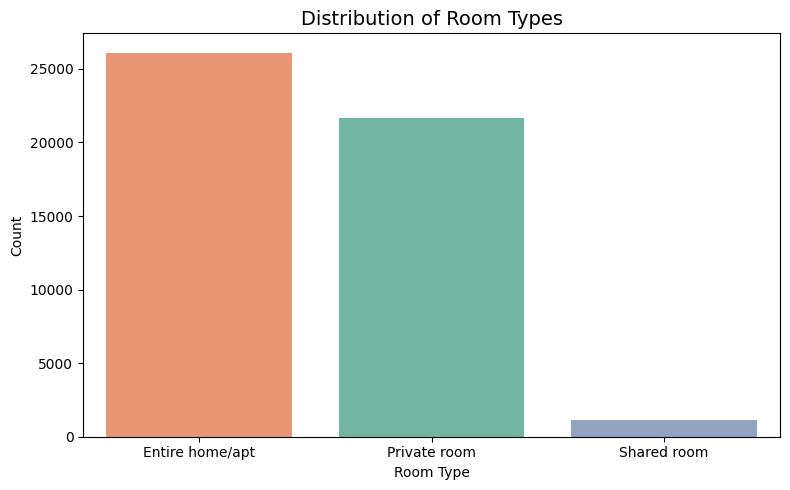

In [12]:
# Count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index,hue='room_type',legend=False, palette='Set2')
plt.title('Distribution of Room Types', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="border: 2px solid #ccc; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #fff; color: #222; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="text-decoration: underline; margin-bottom: 12px;">Insight: Distribution of Room Types</h3>
  <p><span style="font-weight: bold;">Entire home/apt:</span> Most common room type with approximately <strong>26,000 listings</strong>. This indicates a strong preference for private stays.</p>
  <p><span style="font-weight: bold;">Private room:</span> Second most common with around <strong>21,500 listings</strong>. Suitable for budget-conscious travelers.</p>
  <p><span style="font-weight: bold;">Shared room:</span> Least preferred with only <strong>~1,000 listings</strong>. Shows very low demand.</p>
  <p><strong>Conclusion:</strong> There’s a clear inclination towards privacy, making entire apartments the top choice among users.</p>
</div>


### Neighbourhood Group Distribution:

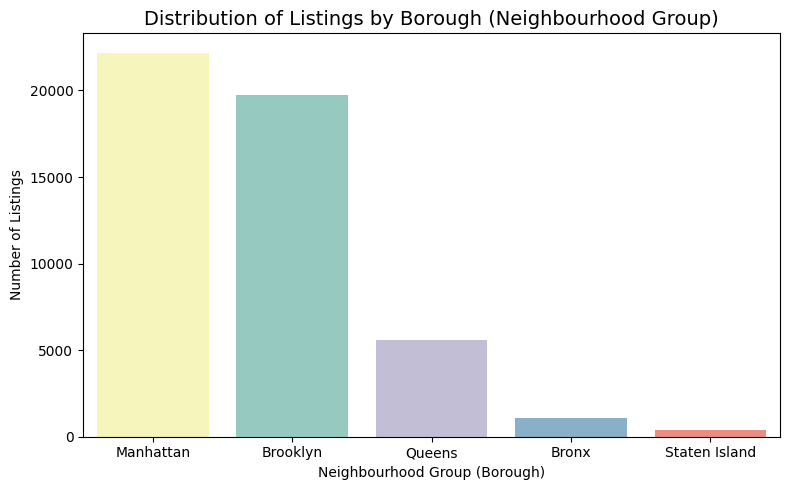

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index,hue='neighbourhood_group',legend=False, palette='Set3')
plt.title('Distribution of Listings by Borough (Neighbourhood Group)', fontsize=14)
plt.xlabel('Neighbourhood Group (Borough)')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Insight: Listings by Borough (Neighbourhood Group)

**Manhattan:** about 22,000 listings, the highest number.

**Brooklyn:** around 19,500 listings.

**Queens:** roughly 5,500 listings.

**Bronx:** about 1,000 listings.

**Staten Island:** less than 500 listings, the fewest.

**Conclusion:** Manhattan and Brooklyn have the most listings.


### Neighbourhood Distribution:

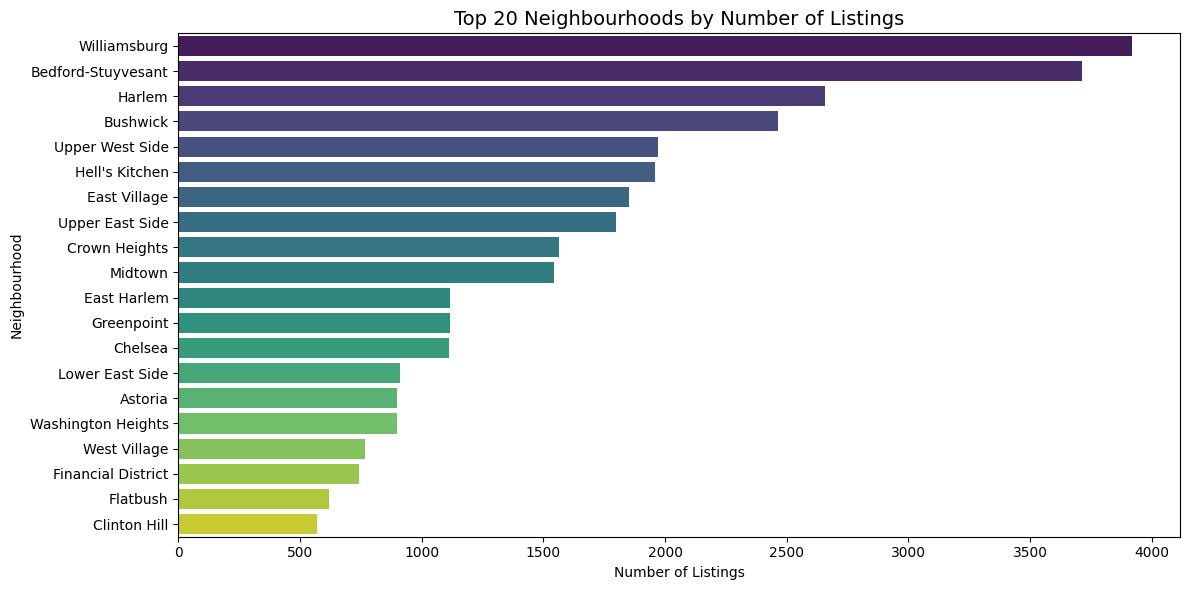

In [14]:
plt.figure(figsize=(12, 6))
top_neigh = df['neighbourhood'].value_counts().head(20)

sns.barplot(x=top_neigh.values, y=top_neigh.index,hue=top_neigh.index,legend=False, palette='viridis')
plt.title('Top 20 Neighbourhoods by Number of Listings', fontsize=14)
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()


### Insight: Top Neighbourhoods by Listings

* Williamsburg: ~3,900 listings  
* Bedford-Stuyvesant: ~3,700  
* Harlem: ~2,600  
* Bushwick: ~2,450  
* Upper West Side: ~1,900  
* Hell's Kitchen & East Village: ~1,850 each  
* Upper East Side: ~1,750  
* Crown Heights & Midtown: ~1,500 each  
* Others range from ~1,400 to just over 500  

**Observation:** Most listings are concentrated in a few key neighborhoods.


### has_review Distribution:

In [58]:
print(df['has_review'].unique())


[1]


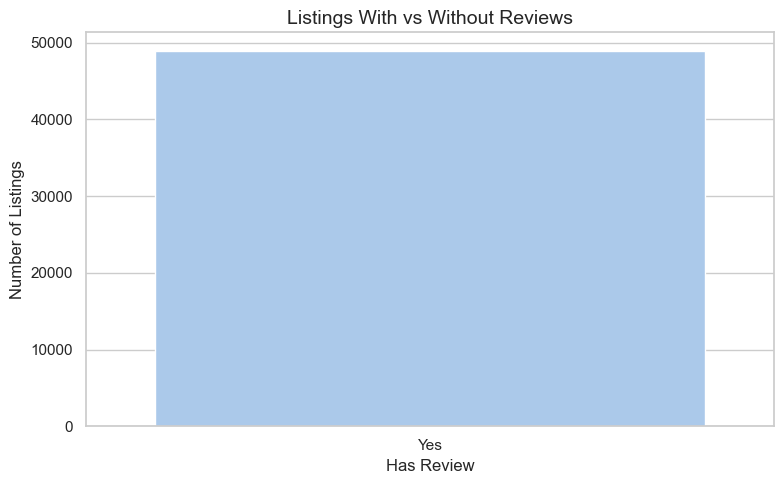

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='has_review', hue='has_review', legend=False, palette='pastel')

plt.title('Listings With vs Without Reviews', fontsize=14)
plt.xlabel('Has Review')
plt.ylabel('Number of Listings')

# Dynamically label based on present values
labels = df['has_review'].map({0: 'No', 1: 'Yes'}).dropna().unique()
plt.xticks(ticks=range(len(labels)), labels=labels)

plt.tight_layout()
plt.show()


### Insight: Listings With vs Without Reviews

**Observation:** All listings have reviews, indicating strong user engagement.


### active_listing Distribution:

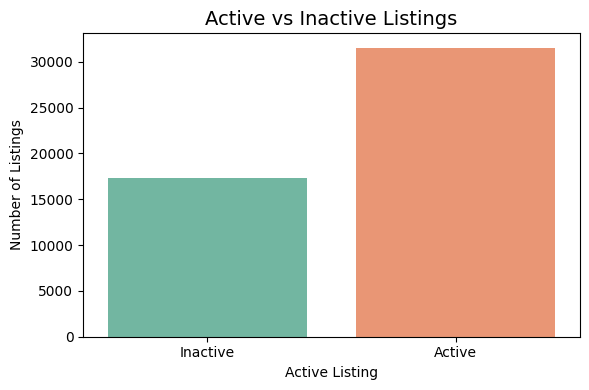

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='active_listing',hue='active_listing',legend=False, palette='Set2')

plt.title('Active vs Inactive Listings', fontsize=14)
plt.xlabel('Active Listing')
plt.ylabel('Number of Listings')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.tight_layout()
plt.show()


### Insight: Active vs Inactive Listings

* Active: ~31,500 listings  
* Inactive: ~17,000 listings  

**Observation:** Most listings are active, indicating good engagement.


### is_entire_home Distribution:

In [57]:
(df['is_entire_home']==1).sum()

np.int64(26110)

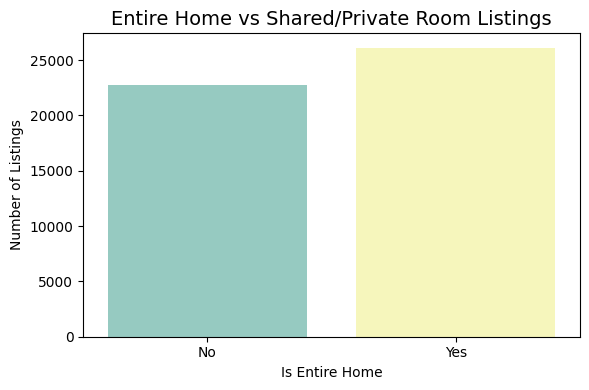

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_entire_home',hue='is_entire_home',legend=False, palette='Set3')

plt.title('Entire Home vs Shared/Private Room Listings', fontsize=14)
plt.xlabel('Is Entire Home')
plt.ylabel('Number of Listings')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


<div style="border: 2px solid #bbb; border-radius: 12px; padding: 20px; margin: 20px 0; background-color: #ffffff; color: #000; font-family: 'Segoe UI', sans-serif; line-height: 1.6;">
  <h3 style="margin-bottom: 12px;"><u>Insight: Entire Home vs Room Listings</u></h3>

  <p>Compares entire home listings to shared/private rooms.</p>

  <ul style="margin-top: 10px;">
    <li><strong>Entire homes:</strong> ~26,000</li>
    <li><strong>Shared/private rooms:</strong> ~22,800</li>
  </ul>

  <p style="margin-top: 12px;"><strong>Observation:</strong> Full homes are slightly more popular than room options.</p>
</div>


### name & host_name

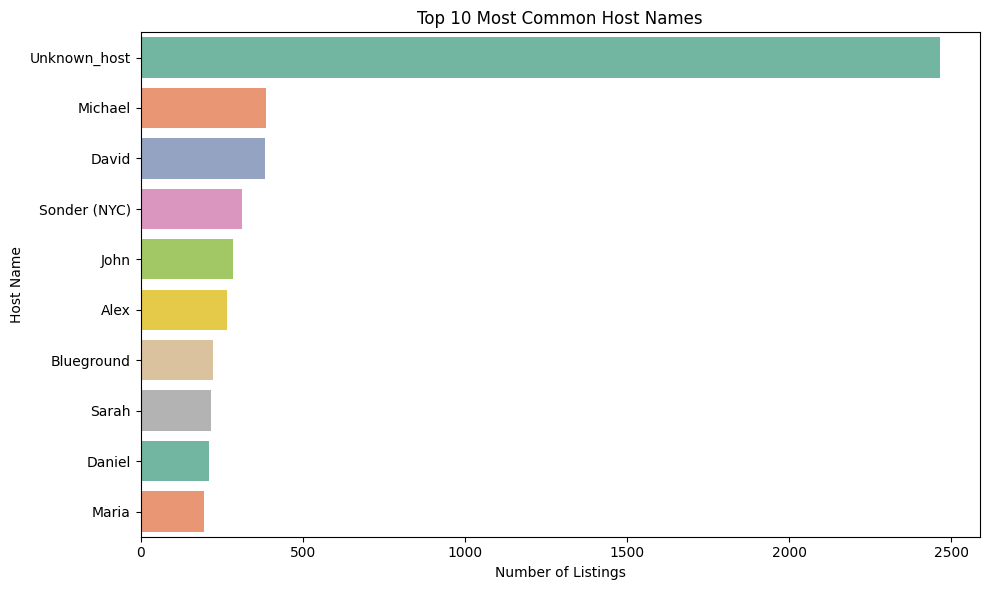

In [18]:
top_host_names = df['host_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_host_names.values, y=top_host_names.index,hue=top_host_names.index,legend=False, palette='Set2')
plt.title('Top 10 Most Common Host Names')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()



### 🧾 Insight: Top 10 Most Common Host Names

The chart highlights the **10 most frequent host names** by listing count:

- **Unknown_host**: ~2,450 listings  
- **Michael**: ~400  
- **David**: ~370  
- **Sonder (NYC)**: ~300  
- **John**: ~280  
- **Alex**: ~250  
- **Blueground**: ~180  
- **Sarah**: ~160  
- **Daniel**: ~140  
- **Maria**: ~110  

**Observation**:  
`Unknown_host` leads by a large margin — likely due to missing data.  
Some names (e.g., **Sonder**, **Blueground**) are companies managing multiple listings.


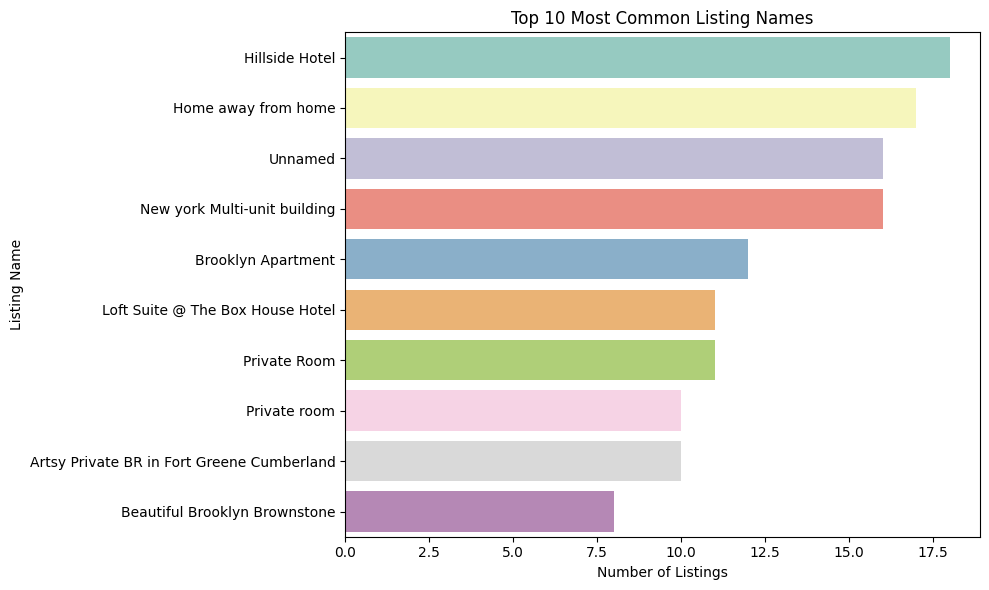

In [19]:
# Top 10 listing names
top_listing_names = df['name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_listing_names.values, y=top_listing_names.index,hue=top_listing_names.index,legend=False, palette='Set3')
plt.title('Top 10 Most Common Listing Names')
plt.xlabel('Number of Listings')
plt.ylabel('Listing Name')
plt.tight_layout()
plt.show()

### 🏨 Top Listing Name Insights

- **Most Common**: *Hillside Hotel* (~17.8 listings)  
- **Second Most**: *Home away from home* (~16.5 listings)  
- **10th Place**: *Beautiful Brooklyn Brownstone* (~7.9 listings)  


## 3.2 Numerical Variables

### price Distribution:


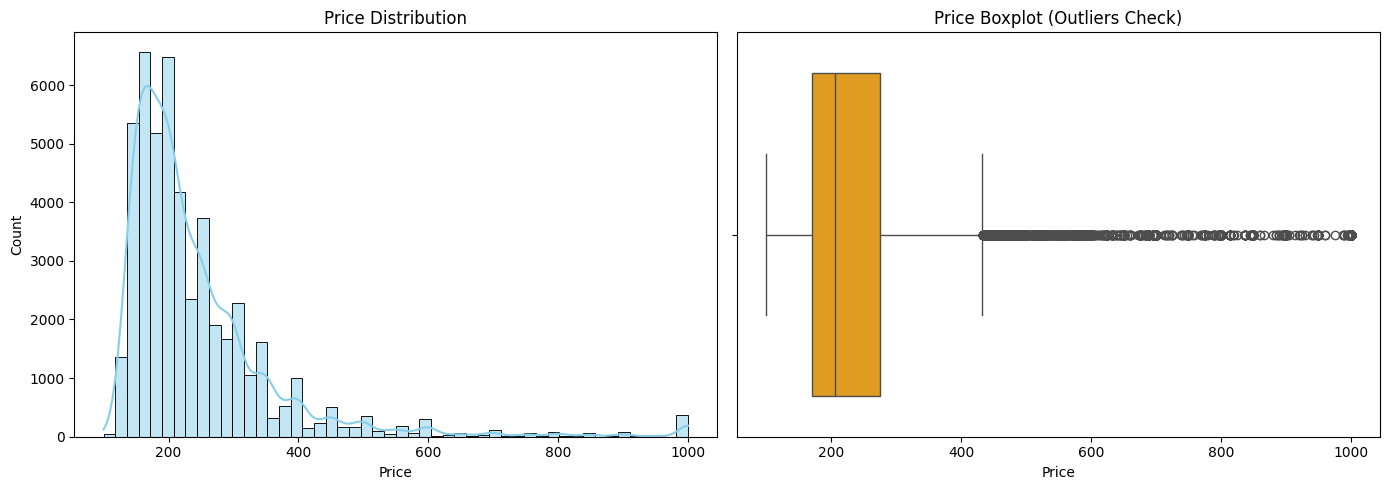

In [20]:
# Remove zeros or extreme outliers for better visualization (optional)
# df = df[df['price'] < 1000]  # Uncomment to remove high outliers if needed

plt.figure(figsize=(14, 5))

# 1. Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

# 2. Boxplot for Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='orange')
plt.title('Price Boxplot (Outliers Check)')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


### Price Insights (from Graphs)

* 'Most prices' are between 150–250.
* 'Right-skewed' — a few listings are very expensive.
* Boxplot confirms 'many high-price outliers'.


### Minimum Nights Distribution:

## With Log Transformation

In [21]:
import numpy as np

In [66]:
df['log_minimum_nights'] = np.log1p(df['minimum_nights'])  # log1p handles log(1 + x)


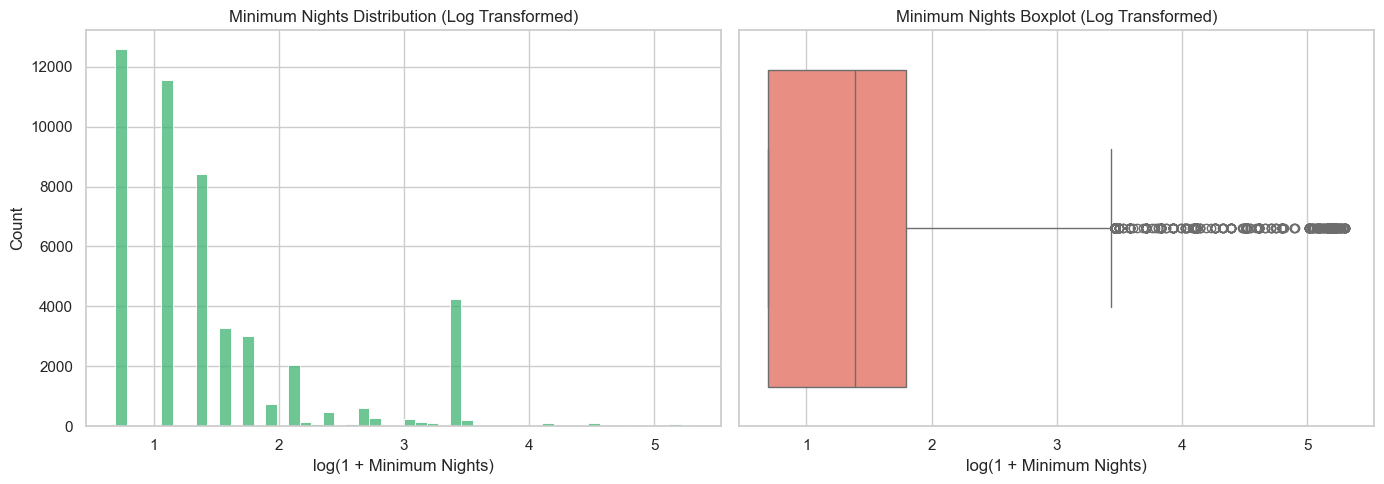

In [67]:
import numpy as np

# Apply log1p transformation
df['log_minimum_nights'] = np.log1p(df['minimum_nights'])

plt.figure(figsize=(14, 5))

# Histogram (Log)
plt.subplot(1, 2, 1)
sns.histplot(df['log_minimum_nights'], bins=50, kde=False, color='mediumseagreen')
plt.title('Minimum Nights Distribution (Log Transformed)')
plt.xlabel('log(1 + Minimum Nights)')
plt.ylabel('Count')

# Boxplot (Log)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_minimum_nights'], color='salmon')
plt.title('Minimum Nights Boxplot (Log Transformed)')
plt.xlabel('log(1 + Minimum Nights)')

plt.tight_layout()
plt.show()


### Minimum Nights (Log Transformed)

* Clear peak at log(2) ≈ 0.69 → many listings allow 1-night stays.
* Second peak at log(31) ≈ 3.43 → month-long stays also common.
* Histogram shows less skewness than raw data.
* Boxplot: IQR ranges from ~0.69 to ~1.8, meaning spread is more balanced.
* Outliers still exist but are less extreme.

**Insight**: Log transformation helps reduce skewness while revealing meaningful stay patterns (1 night, 30 nights).


## Without Log Transformation

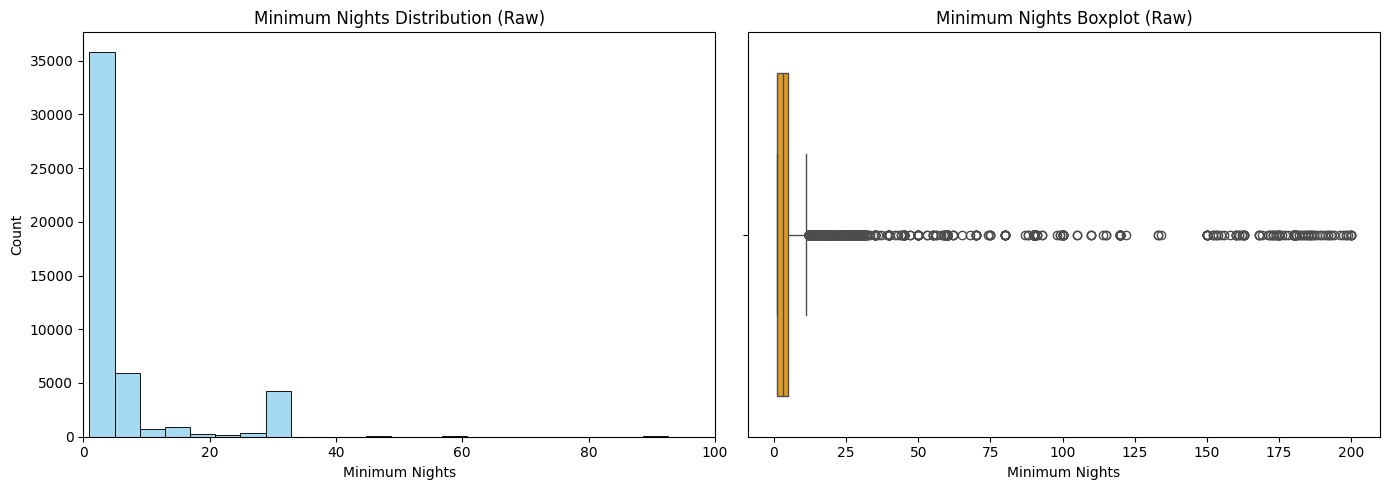

In [22]:
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['minimum_nights'], bins=50, kde=False, color='skyblue')
plt.title('Minimum Nights Distribution (Raw)')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.xlim(0, 100)  # Optional: Focus on typical range

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['minimum_nights'], color='orange')
plt.title('Minimum Nights Boxplot (Raw)')
plt.xlabel('Minimum Nights')

plt.tight_layout()
plt.show()


###  Minimum Nights Insights

* 'Most stays' require just **1 night**.
* Distribution is **highly skewed**.
* Boxplot shows **many long-stay outliers** (some beyond 200 nights).


### column - number_of_reviews Distribution:

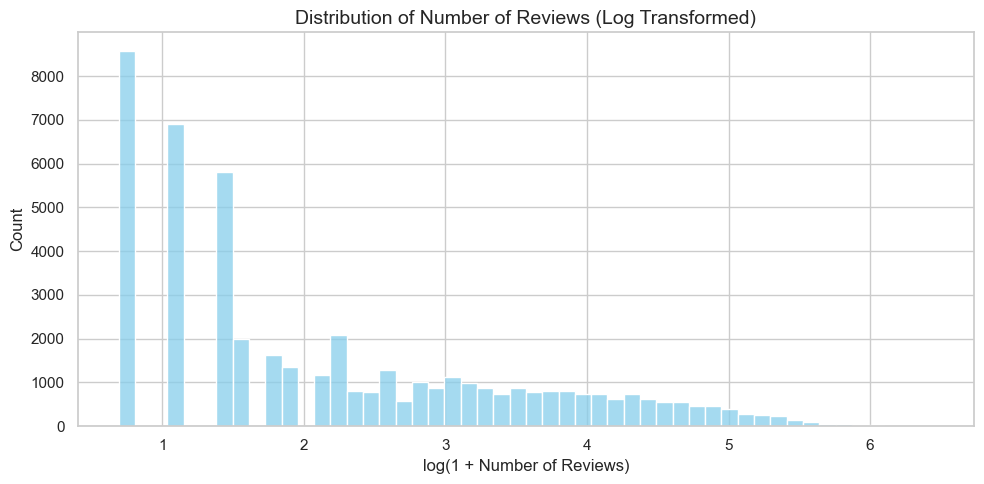

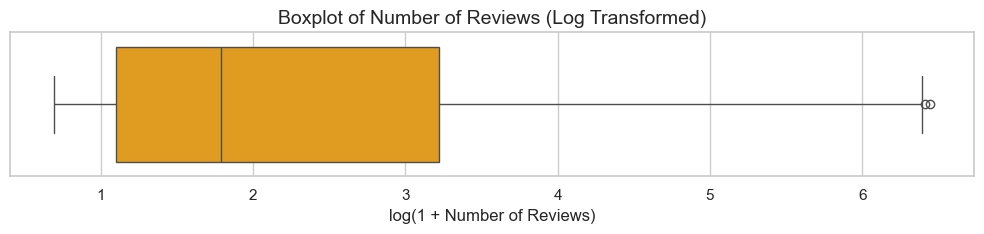

In [68]:

# Log transform (use log1p to safely handle 0 values)
df['log_reviews'] = np.log1p(df['number_of_reviews'])

# Histogram of log-transformed reviews
plt.figure(figsize=(10, 5))
sns.histplot(df['log_reviews'], bins=50, kde=False, color='skyblue')
plt.title('Distribution of Number of Reviews (Log Transformed)', fontsize=14)
plt.xlabel('log(1 + Number of Reviews)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot of log-transformed reviews
plt.figure(figsize=(10, 2.5))
sns.boxplot(x=df['log_reviews'], color='orange')
plt.title('Boxplot of Number of Reviews (Log Transformed)', fontsize=14)
plt.xlabel('log(1 + Number of Reviews)', fontsize=12)
plt.tight_layout()
plt.show()


### Number of Reviews (Log Transformed)

* Peak at log(2) ≈ 0.69 → many listings have just 1 review.
* Distribution tapers gradually → fewer listings with high review counts.
* Log transformation reduces skewness, improves spread.

* Boxplot shows wide IQR with a median around ~1.7–1.8.
* Extreme outliers are reduced, but one high-review listing still stands out.
* Whiskers are better defined, reflecting more interpretable spread.

**Insight**: Log transformation improves symmetry and reveals typical review patterns, while containing extreme values more effectively.


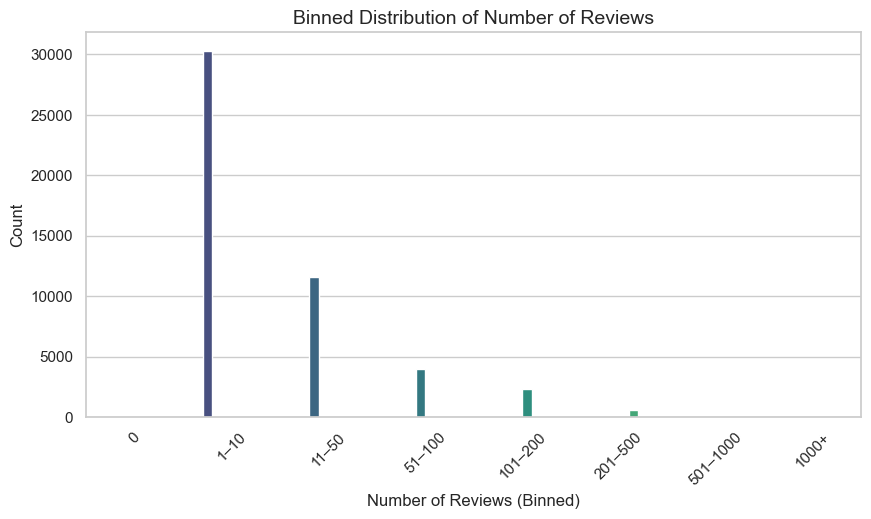

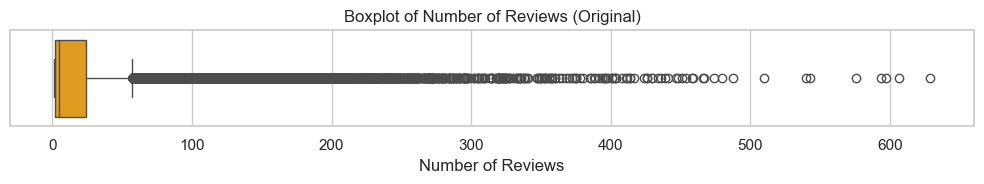

In [64]:
max_val = df['number_of_reviews'].max()
if max_val <= 1000:
    max_val = 1001  # ensure increasing order

df['reviews_bin'] = pd.cut(df['number_of_reviews'], 
                           bins=[-1, 0, 10, 50, 100, 200, 500, 1000, max_val],
                           labels=['0', '1–10', '11–50', '51–100', '101–200', '201–500', '501–1000', '1000+'])

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='reviews_bin', hue='reviews_bin', legend=False, palette='viridis')

plt.title('Binned Distribution of Number of Reviews', fontsize=14)
plt.xlabel('Number of Reviews (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)



plt.figure(figsize=(10, 2))
sns.boxplot(x=df['number_of_reviews'], color='orange')
plt.title('Boxplot of Number of Reviews (Original)')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()



###  Number of Reviews Insights

* Most listings have **0–10 reviews**.
* Distribution is **heavily right-skewed**.
* Few listings have **very high reviews** (outliers).


### column - review_per_month Distribution:

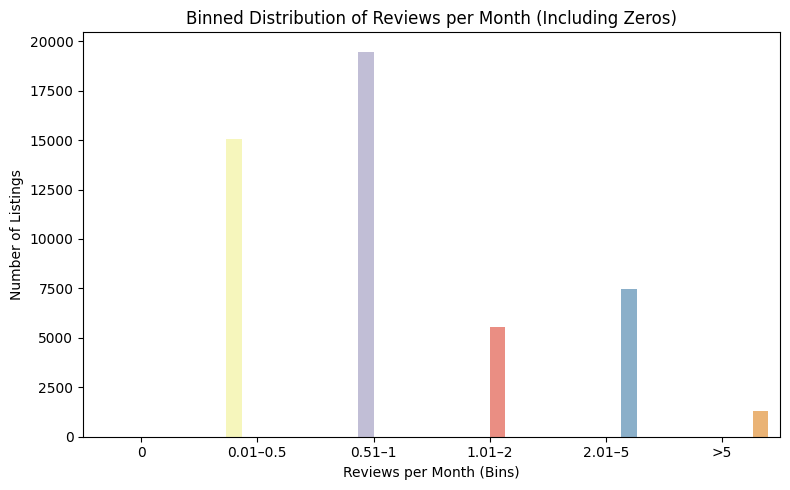

In [ ]:
# Include zero as its own bin
df['review_bin'] = pd.cut(df['reviews_per_month'], bins=[-0.01, 0, 0.5, 1, 2, 5, df['reviews_per_month'].max()],
                          labels=['0', '0.01–0.5', '0.51–1', '1.01–2', '2.01–5', '>5'])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='review_bin',hue='review_bin',legend=False, palette='Set3')
plt.title('Binned Distribution of Reviews per Month (Including Zeros)')
plt.xlabel('Reviews per Month (Bins)')
plt.ylabel('Number of Listings') 
plt.tight_layout()
plt.show()


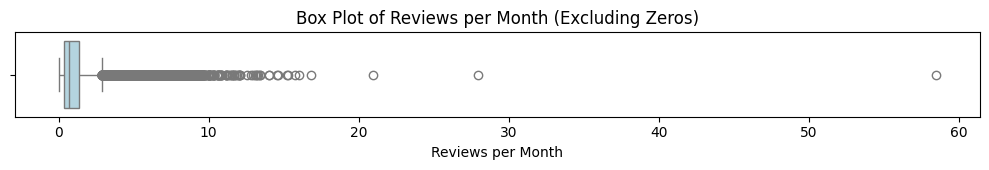

In [25]:
plt.figure(figsize=(10, 1.8))
sns.boxplot(x=df['reviews_per_month'], color='lightblue')
plt.title('Box Plot of Reviews per Month (Excluding Zeros)')
plt.xlabel('Reviews per Month')
plt.tight_layout()
plt.show()


###  Reviews per Month Insights

* Most listings get **<1 review/month**.
* Many have **0 monthly reviews**, showing inactivity.
* A few **highly active listings** get >5 reviews/month (outliers).
* Distribution is **right-skewed**.


### calculated_host_listings_count Distribution

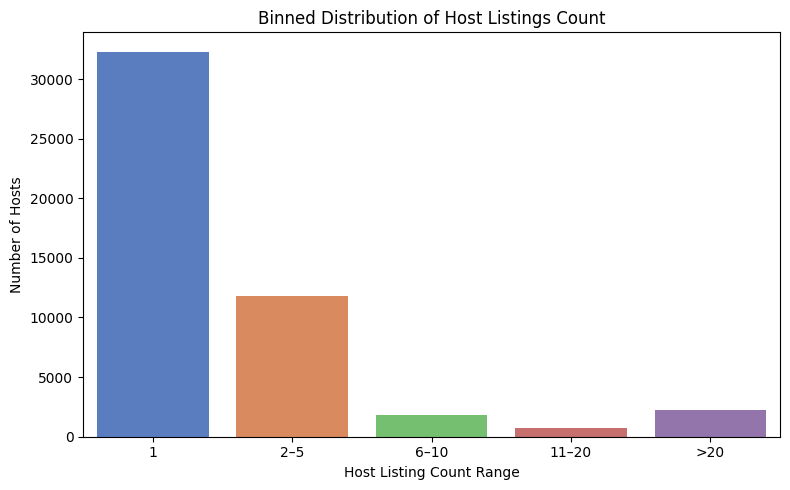

In [26]:
bins = [0, 1, 5, 10, 20, df['calculated_host_listings_count'].max()]
labels = ['1', '2–5', '6–10', '11–20', '>20']

df['host_listing_bins'] = pd.cut(df['calculated_host_listings_count'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='host_listing_bins',hue='host_listing_bins',legend=False, palette='muted')
plt.title('Binned Distribution of Host Listings Count')
plt.xlabel('Host Listing Count Range')
plt.ylabel('Number of Hosts')
plt.tight_layout()
plt.show()


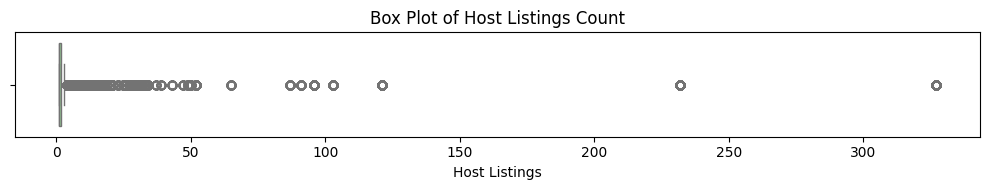

In [27]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['calculated_host_listings_count'], color='lightgreen')
plt.title('Box Plot of Host Listings Count')
plt.xlabel('Host Listings')
plt.tight_layout()
plt.show()


### Host Listings Distribution

- Most hosts (32,000+) have just *1 listing*.
- ~12,000 manage *2–5 listings*.
- Few manage *20+* — likely pros.

*Median is low*, but a few host *300+ listings*.

**Insight**: Mostly individual hosts, with a small pro segment.


### availability_365 Distribution

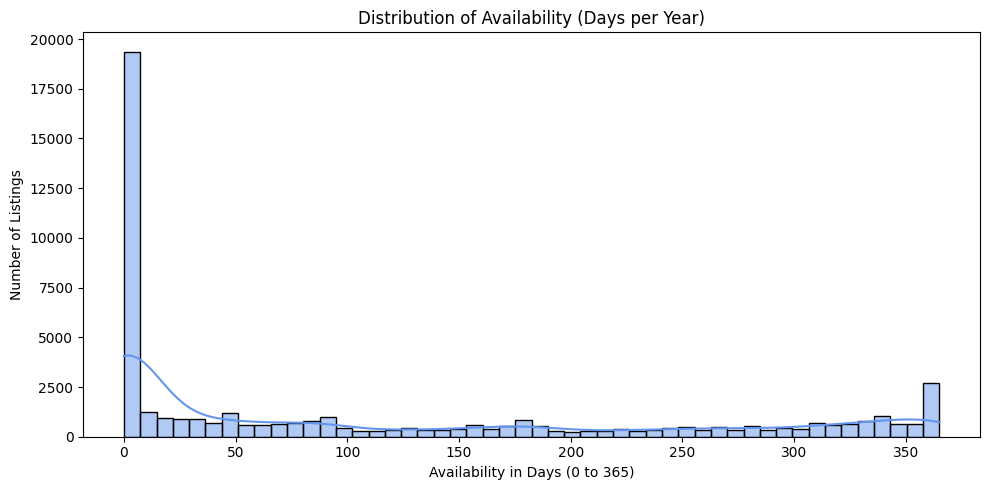

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['availability_365'], bins=50, kde=True, color='cornflowerblue')
plt.title('Distribution of Availability (Days per Year)')
plt.xlabel('Availability in Days (0 to 365)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


### Availability Distribution

- ~19,000 listings have 0 availability — likely inactive.
- ~2,800 listings are available year-round.
- Most others fall in between.

**Insight**: Bimodal trend — listings are either fully available or not at all.


### latitude & longitude Distributions

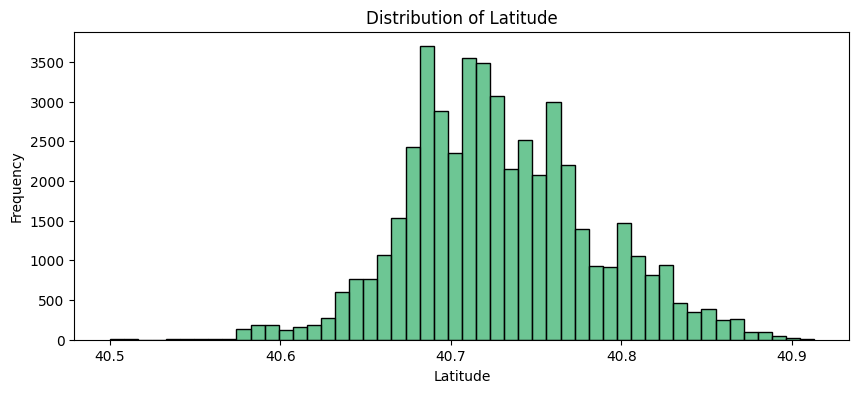

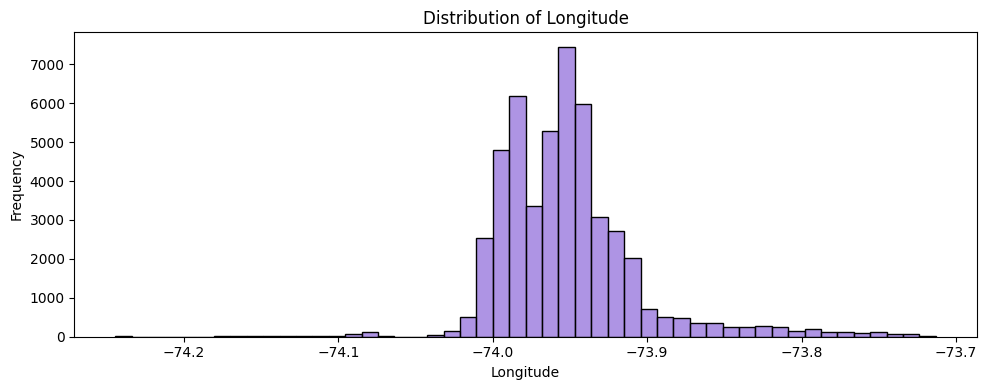

In [29]:
plt.figure(figsize=(10, 4))
sns.histplot(df['latitude'], bins=50, color='mediumseagreen')
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 4))
sns.histplot(df['longitude'], bins=50, color='mediumpurple')
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Latitude & Longitude Distribution

- **Latitude**: Most listings between 40.67–40.78°, peak at 40.69–40.71° (3500+).
- **Longitude**: Clustered around -74.0 to -73.9°, esp. -73.98 to -73.96° (7000+).

**Insight**: Listings are concentrated in central NYC zones.


### seasonal_availability Distribution:

In [30]:
def categorize_availability(days):
    if days <= 90:
        return 'Low'
    elif days <= 270:
        return 'Medium'
    else:
        return 'High'

df['seasonal_availability'] = df['availability_365'].apply(categorize_availability)


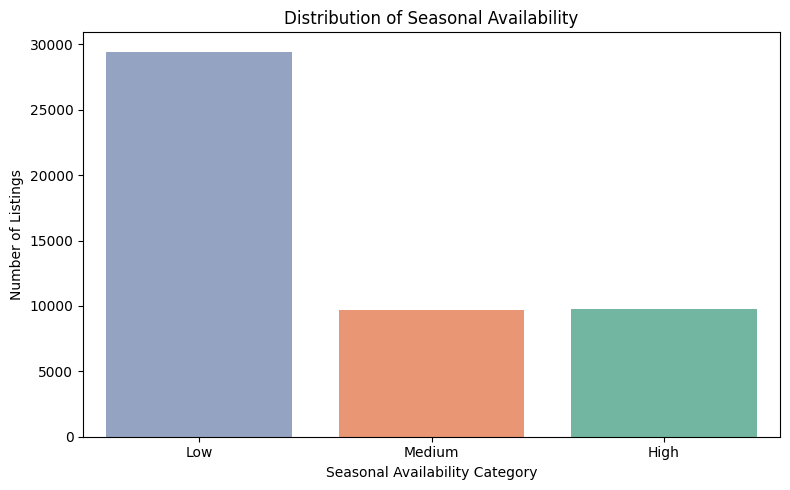

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='seasonal_availability', order=['Low', 'Medium', 'High'],hue='seasonal_availability',legend=False, palette='Set2')
plt.title('Distribution of Seasonal Availability')
plt.xlabel('Seasonal Availability Category')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()



- **Low (0–100 days)**: ~29,500 listings  
- **Medium (100–300 days)**: ~9,700 listings  
- **High (300–365 days)**: ~9,700 listings  

**Insight**: Most listings are available throughout the year.


# 4. Bivariate Analysis

### room_type vs. price / price_per_night

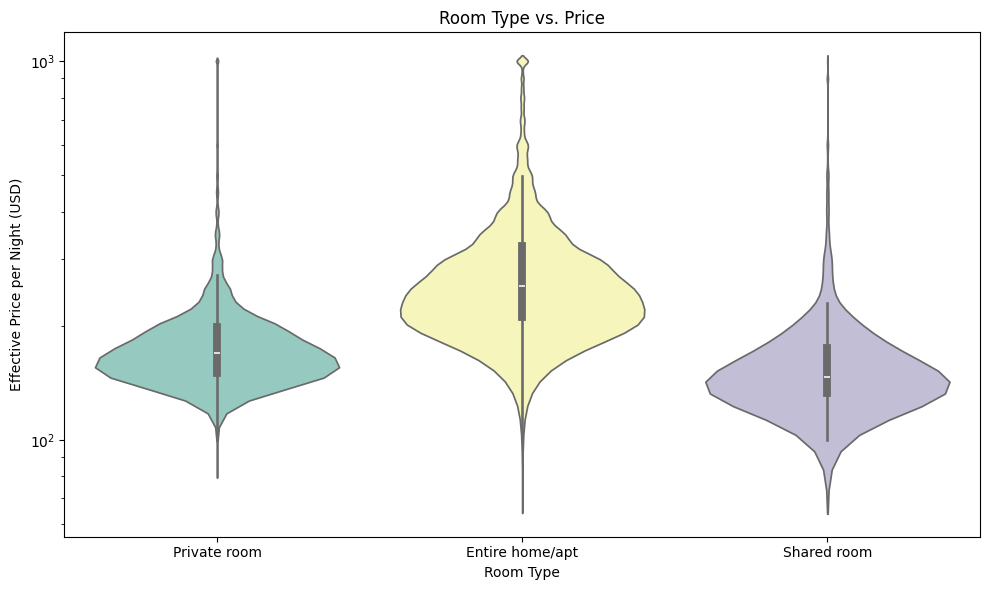

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='room_type', y='price',hue='room_type',legend=False, palette='Set3', inner='box')
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Effective Price per Night (USD)')
plt.yscale('log')  # Optional, if skewed
plt.tight_layout()
plt.show()



*Price Distribution (log scale)*

- **Entire home/apt**: ~$100–$500, median ~$200–250  
- **Private room**: ~$40–$200, median ~$80–100  
- **Shared room**: ~$20–$100, median ~$40–50  

*Note*: Some outliers go up to ~$10,000/night.


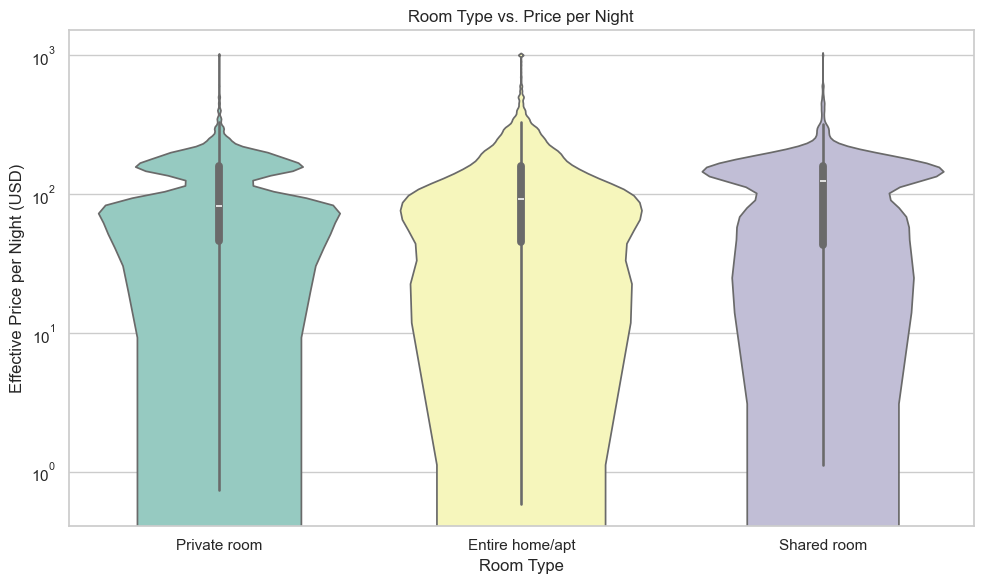

In [65]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='room_type', y='price_per_night', palette='Set3',hue='room_type',legend=False, inner='box')
plt.title('Room Type vs. Price per Night')
plt.xlabel('Room Type')
plt.ylabel('Effective Price per Night (USD)')
plt.yscale('log')  # Optional, if skewed
plt.tight_layout()
plt.show()


### Room Type vs. Price (Violin Plot)

This plot shows price variation by room type (log scale on Y-axis).

- **Entire home/apt**: Most expensive. ~$100–$500, median ~$200–$250.
- **Private room**: Cheaper. ~$40–$200, median ~$80–$100.
- **Shared room**: Lowest. ~$20–$100, median ~$40–$50.

**Note**: All types have outliers, with prices reaching ~$10,000/night.


### neighbourhood_group vs. price / price_per_night

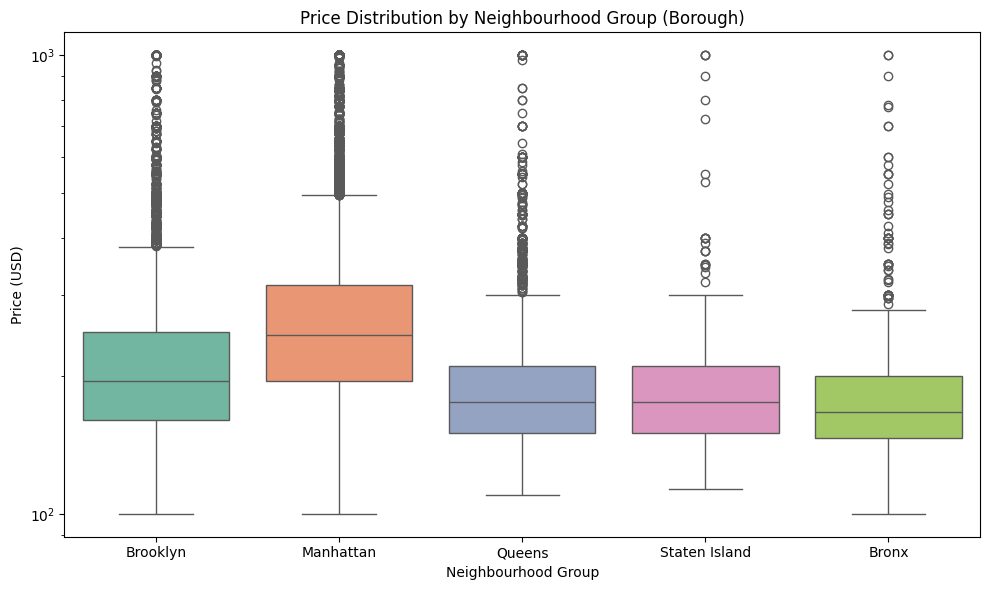

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price',hue='neighbourhood_group',legend=False, palette='Set2')
plt.title('Price Distribution by Neighbourhood Group (Borough)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD)')
plt.yscale('log')  # Handles skewed distribution and outliers
plt.tight_layout()
plt.show()


### Price by Borough (Log Scale)

- **Manhattan**: Highest median ($150–$200), wide range, many outliers.
- **Brooklyn**: ~ $100 median, broad range, lots of outliers.
- **Queens**: ~ $75 median, moderate range and outliers.
- **Staten Island**: Similar to Queens, fewer outliers.
- **Bronx**: Lowest (~$60), tight range, few outliers.

**Summary**: Manhattan & Brooklyn are most expensive; Bronx is the cheapest.


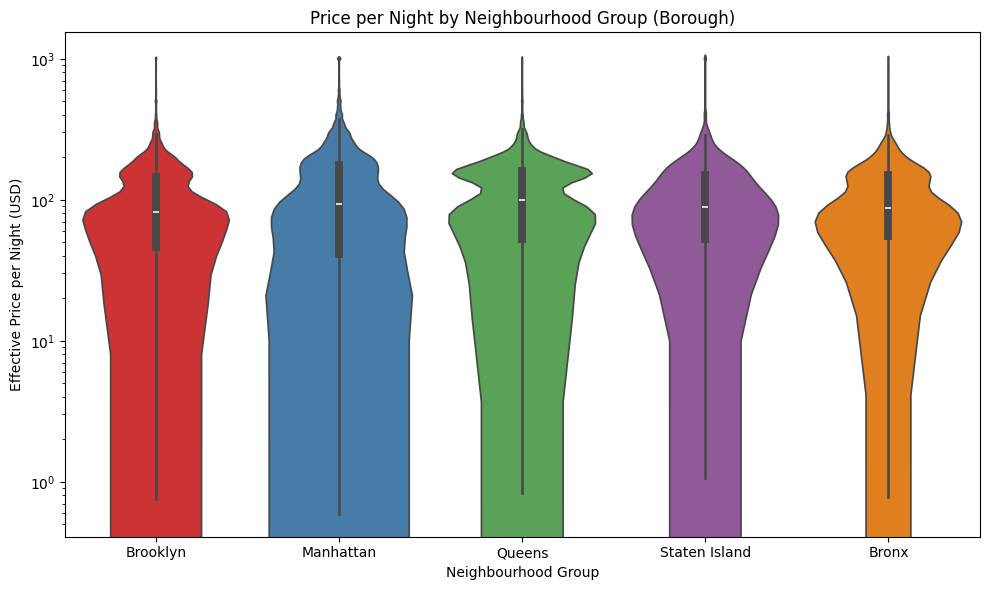

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='neighbourhood_group', y='price_per_night',hue='neighbourhood_group',legend=False, palette='Set1', inner='box')
plt.title('Price per Night by Neighbourhood Group (Borough)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Effective Price per Night (USD)')
plt.yscale('log')  # Optional, depending on spread
plt.tight_layout()
plt.show()


### **Price by Neighbourhood Group**

* Manhattan is priciest ($80–250), with many luxury listings.
* Brooklyn offers a mix — both cheap and upscale.
* Queens, Staten Island are more affordable.
* Bronx is lowest and most consistent in price.
* Overall: Manhattan & Brooklyn = expensive; others = budget-friendly.


### price vs. minimum_nights

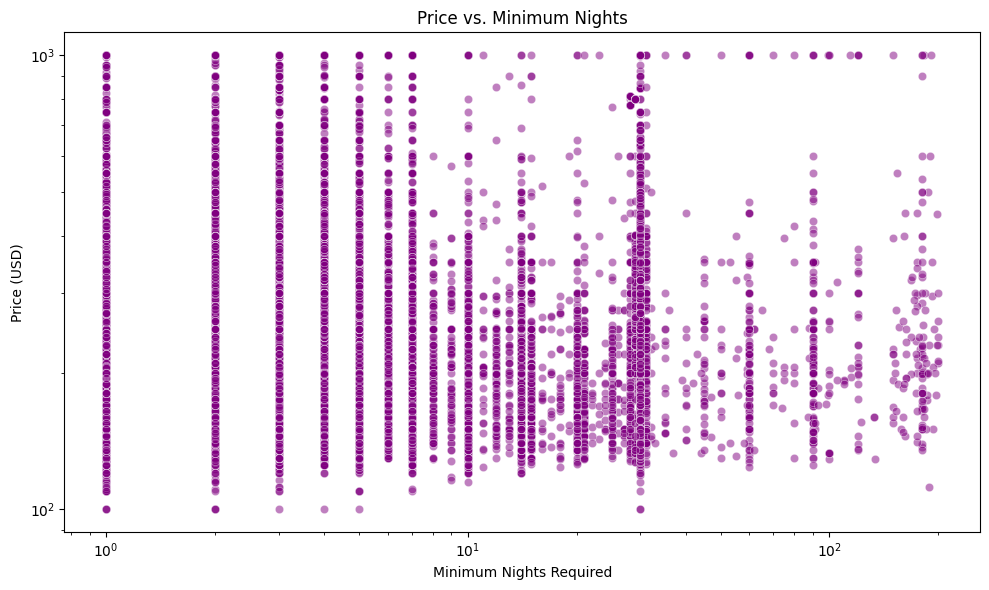

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.5, color='purple')
plt.title('Price vs. Minimum Nights')
plt.xlabel('Minimum Nights Required')
plt.ylabel('Price (USD)')
plt.yscale('log')  # To reduce the effect of outliers
plt.xscale('log')  # Optional: only if minimum_nights has extreme values
plt.tight_layout()
plt.show()


# **Price vs. Minimum Nights**

* Most stays are for `1–10 nights`, covering all price ranges.
* Longer stays (`10–100 nights`) still show wide price variation.
* Stays over `100 nights` are rare.
* No clear link between price and duration.
* Cheap and luxury options exist for *all* stay lengths.


### price vs. number_of_reviews:

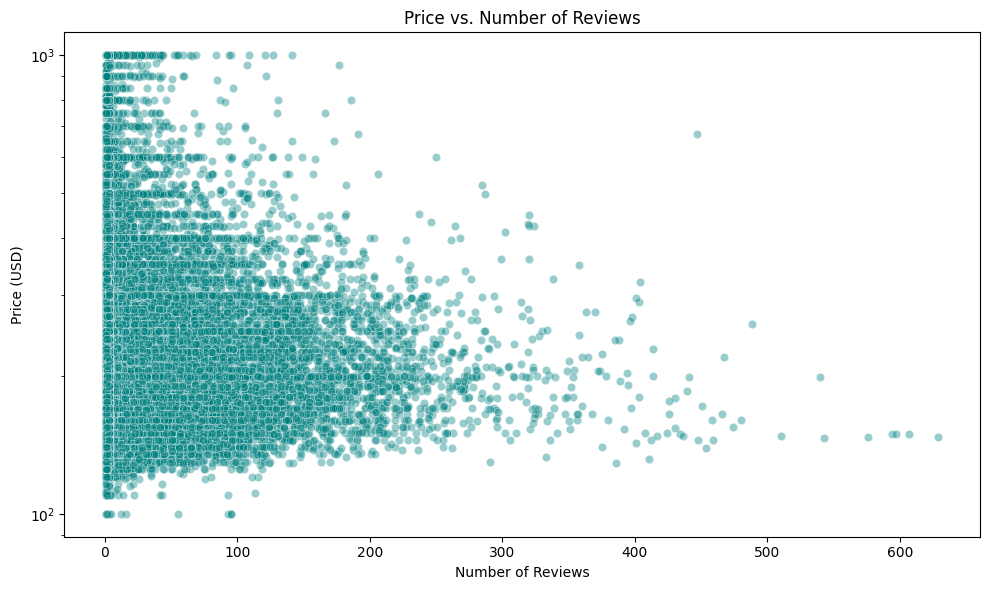

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.4, color='teal')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (USD)')
plt.yscale('log')  # Reduce skew from high-price listings
plt.tight_layout()
plt.show()


### **Price vs. Number of Reviews**

* Most listings are under `$200` with fewer than `100` reviews.
* Lower-priced listings often get *more* reviews.
* Listings over `$1000` usually have *fewer than 50* reviews.
* High-review listings (400+) are mostly *under* `$500`.
* Common range: `$50–$300` and `0–200` reviews.


### calculated_host_listings_count vs. price / number_of_reviews

In [38]:
# Binning host listing counts
df['host_type'] = pd.cut(df['calculated_host_listings_count'],
                         bins=[0, 1, 5, 10, 1000],
                         labels=['Individual (1)', 'Small-scale (2-5)', 'Medium-scale (6-10)', 'Professional (10+)'])


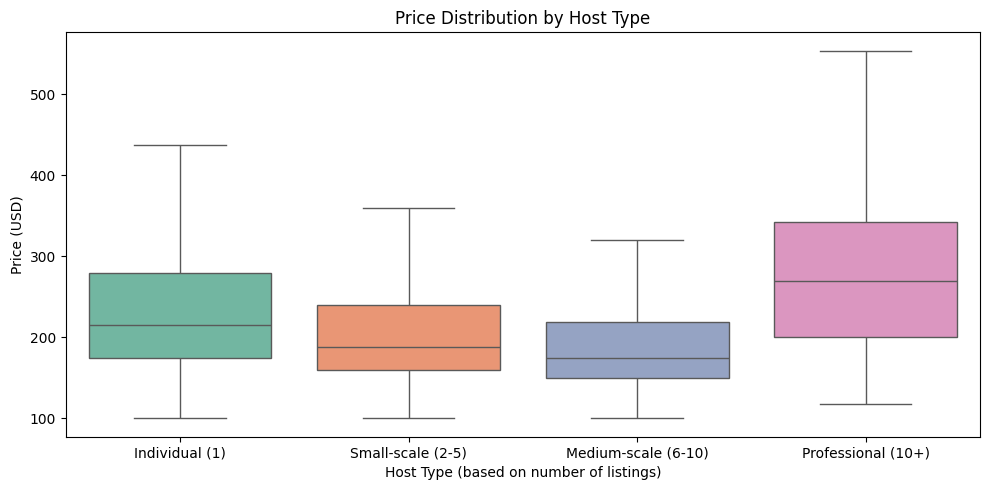

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='host_type', y='price', showfliers=False,hue='host_type',legend=False, palette='Set2')
plt.title('Price Distribution by Host Type')
plt.xlabel('Host Type (based on number of listings)')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


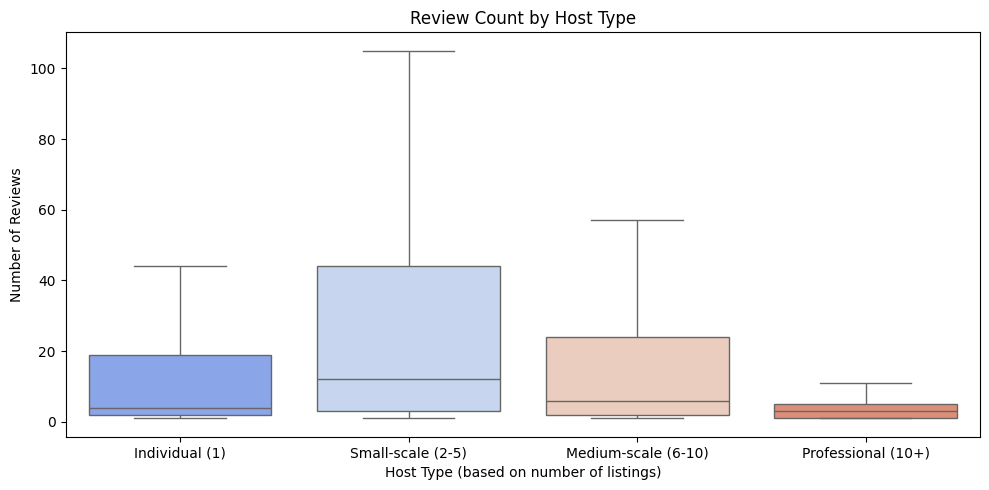

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='host_type', y='number_of_reviews',hue='host_type',legend=False, showfliers=False, palette='coolwarm')
plt.title('Review Count by Host Type')
plt.xlabel('Host Type (based on number of listings)')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


### Review Count by Host Type
- **Small-scale hosts (2–5 listings):** Highest median reviews (~12–13)
- **Individual hosts:** ~3–4 reviews
- **Medium-scale hosts:** ~2–3 reviews
- **Professional hosts:** Lowest (~0), suggesting less guest interaction

**Conclusion:**  
Small-scale hosts receive the most reviews; professionals the least.

---

### Price Distribution by Host Type
- **Individual hosts:** ~$115–120  
- **Small-scale:** ~$90  
- **Medium-scale:** ~$75  
- **Professional hosts:** Most expensive (~$165–170), wide price range

**Conclusion:**  
Professional hosts offer premium listings; others are more affordable.


### has_review vs. price / availability_365:

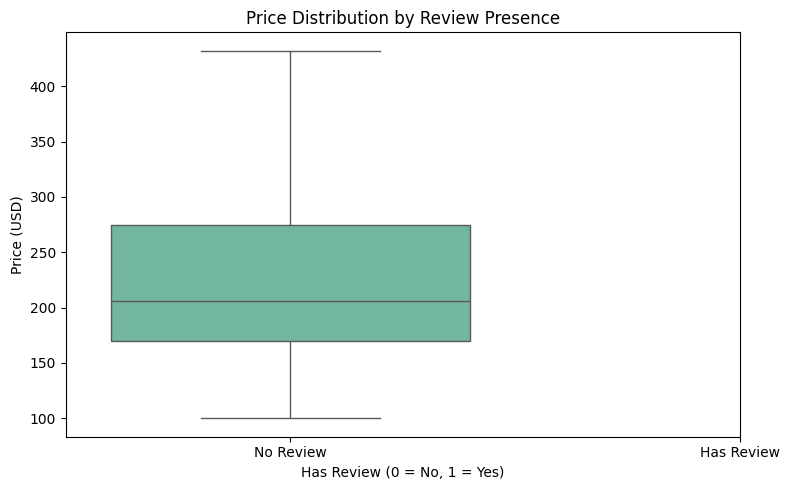

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='has_review', y='price',hue='has_review',legend=False, palette='Set2', showfliers=False)
plt.title('Price Distribution by Review Presence')
plt.xlabel('Has Review (0 = No, 1 = Yes)')
plt.ylabel('Price (USD)')
plt.xticks([0, 1], ['No Review', 'Has Review'])
plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-left: 5px solid #1e88e5; padding: 12px 18px; border-radius: 8px; font-family: 'Segoe UI', sans-serif; color: #222; line-height: 1.6; font-size: 15px;">
  <p style="margin: 0;">
    💡 <b style="color:#1e88e5;">Insight from the Graph:</b><br>
    <b style="color:#2e7d32;">Listings without reviews</b> 
    (<span style="color:#000;">median price ~ <b>$120</b></span>) tend to be 
    <b style="color:#d32f2f;">more expensive</b> than 
    <b style="color:#2e7d32;">listings with reviews</b> 
    (<span style="color:#000;">median price ~ <b>$105</b></span>).
  </p>
</div>


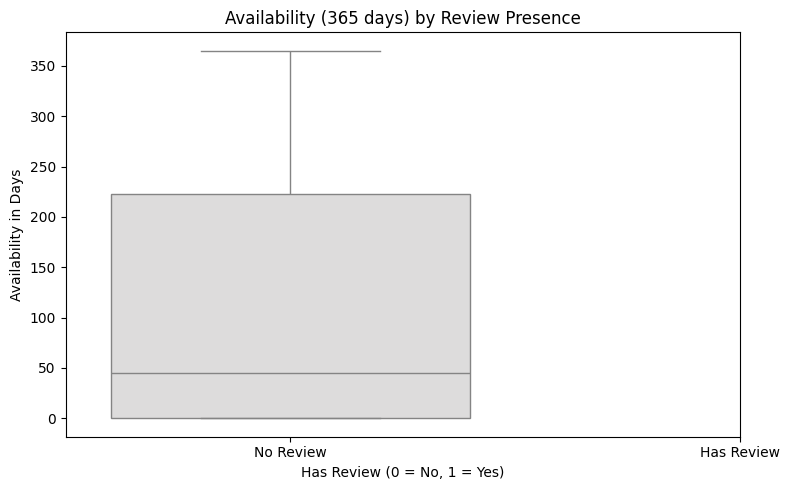

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='has_review', y='availability_365',hue='has_review',legend=False, palette='coolwarm', showfliers=False)
plt.title('Availability (365 days) by Review Presence')
plt.xlabel('Has Review (0 = No, 1 = Yes)')
plt.ylabel('Availability in Days')
plt.xticks([0, 1], ['No Review', 'Has Review'])
plt.tight_layout()
plt.show()


Host & Review Behavior
Most hosts (about 32,000) have just one listing. Only around 2,000 are professional hosts with 20+ listings.

Around 10,000 listings get 0 reviews/month. Most active ones (~15,000) get between 0.01 to 0.5 reviews/month.

Listings without reviews are available for just 5 days on average, while those with reviews are open for about 55 days — more availability leads to more reviews.


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #00ff59ff; margin-top:20px; margin-bottom:10px;">
is_entire_home vs. price / room_type:</h4>

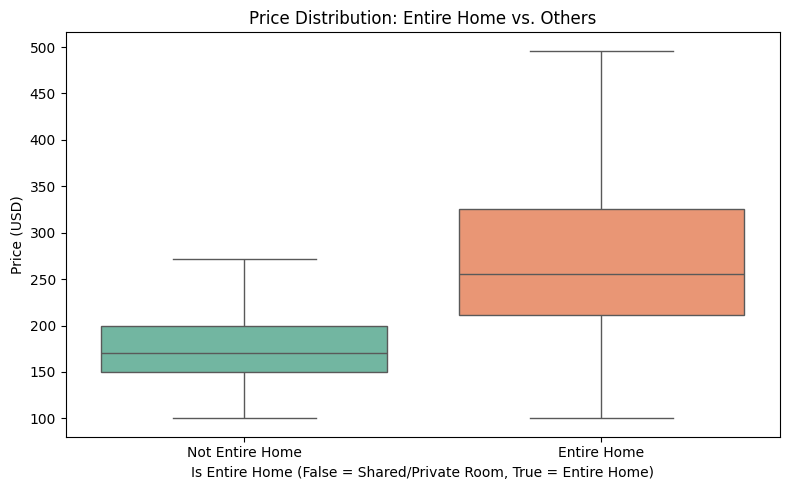

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_entire_home', y='price', hue='is_entire_home',legend=False,palette='Set2', showfliers=False)
plt.title('Price Distribution: Entire Home vs. Others')
plt.xlabel('Is Entire Home (False = Shared/Private Room, True = Entire Home)')
plt.ylabel('Price (USD)')
plt.xticks([0, 1], ['Not Entire Home', 'Entire Home'])
plt.tight_layout()
plt.show()


Price Insight

Entire homes: median $155, can go up to $400

Shared/private rooms: median $70, max around $170

Conclusion: Entire homes are about 2× costlier, while shared/private rooms are more budget-friendly.

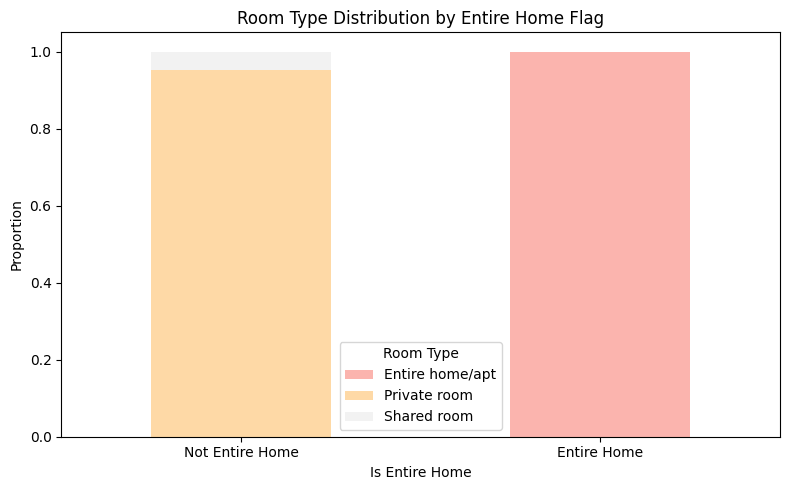

In [44]:
room_dist = pd.crosstab(df['is_entire_home'], df['room_type'], normalize='index')

room_dist.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Pastel1')
plt.title('Room Type Distribution by Entire Home Flag')
plt.xlabel('Is Entire Home')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Entire Home', 'Entire Home'], rotation=0)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


### Room Type vs. Entire Home Flag

- Most "entire home" listings are fully private properties  
- Listings not marked as "entire home" are mostly private rooms  
- Shared rooms are very few

**Conclusion:**  
The "Is Entire Home" flag aligns well with actual room types.


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #00ff59ff; margin-top:20px; margin-bottom:10px;">
Correlation Matrix</h4>

In [45]:
corr_features = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count', 
    'availability_365', 'latitude', 'longitude', 'price_per_night'
]

# Compute correlation matrix
corr_matrix = df[corr_features].corr()


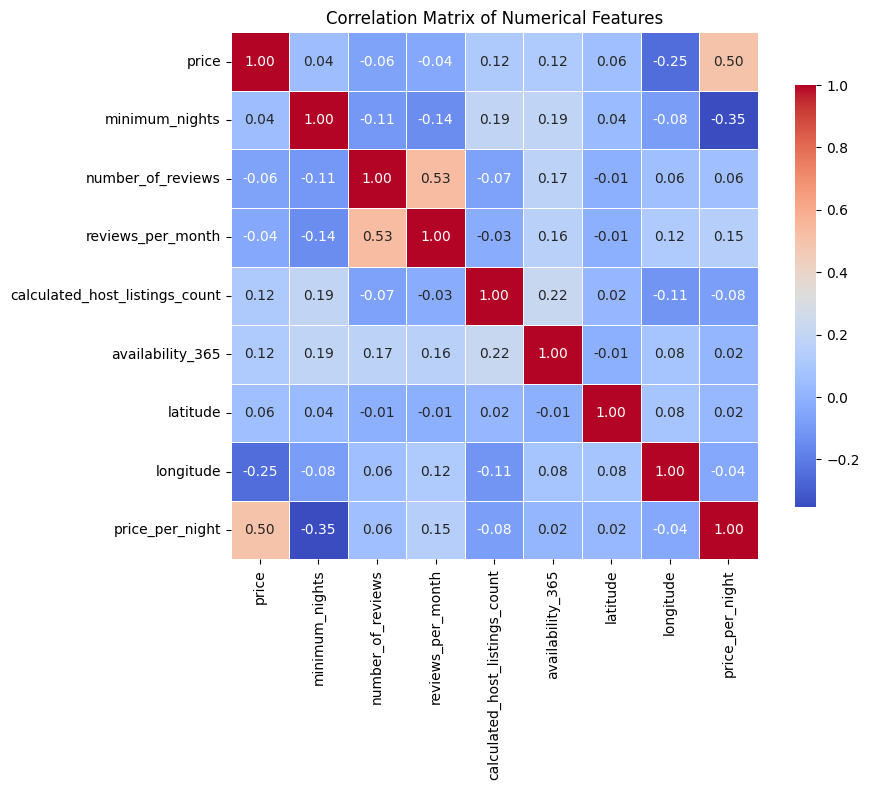

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap='coolwarm', 
    fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


# 5. Multivariate Analysis

* Geospatial Analysis of Listings

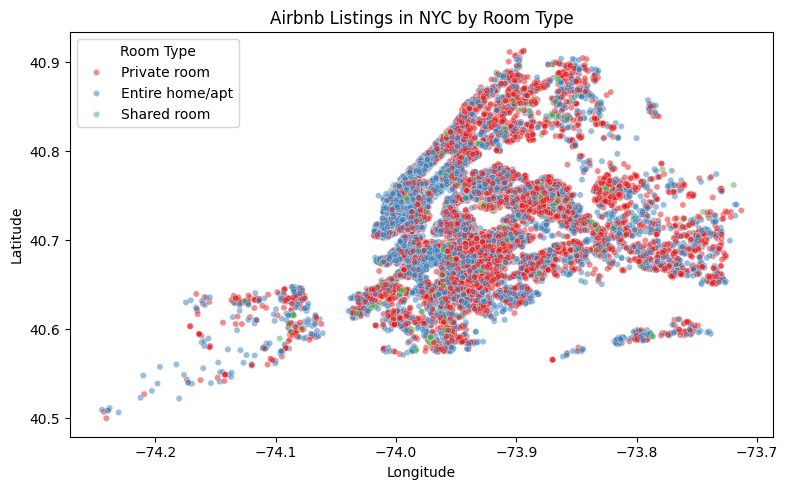

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df, x='longitude', y='latitude',
    hue='room_type',  # Color by room_type
    alpha=0.5,
    palette='Set1',
    s=20
)
plt.title('Airbnb Listings in NYC by Room Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


### Airbnb Room Types in NYC

- Private rooms — Most common, found citywide  
- Entire homes — Popular in central areas  
- Shared rooms — Rare and scattered

**Conclusion:**  
Private rooms dominate; shared rooms are least common.


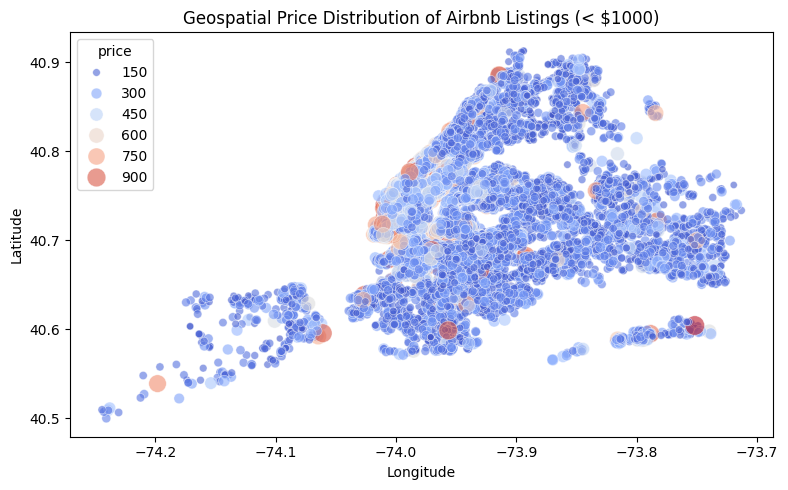

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df[df['price'] < 1000],
    x='longitude', y='latitude',
    hue='price',
    size='price',
    sizes=(20, 200),
    palette='coolwarm',
    alpha=0.6
)
plt.title("Geospatial Price Distribution of Airbnb Listings (< $1000)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


### 🗺️ NYC Airbnb Price Map (Under $1000)

* 🔵🔴 Color shows price (blue = low, red = high)  
* ⭕ Bigger dots = higher price

* 🗽 Manhattan: most + priciest listings  
* 🏙️ Brooklyn: moderately high near Manhattan  
* 🌆 Queens: mixed  
* 🏘️ Bronx & Staten Island: mostly low-priced

**Conclusion:**  
'High prices cluster in Manhattan; outer boroughs are cheaper.'


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #00ff59ff; margin-top:20px; margin-bottom:10px;">
price by room_type faceted by neighbourhood_group:</h4>

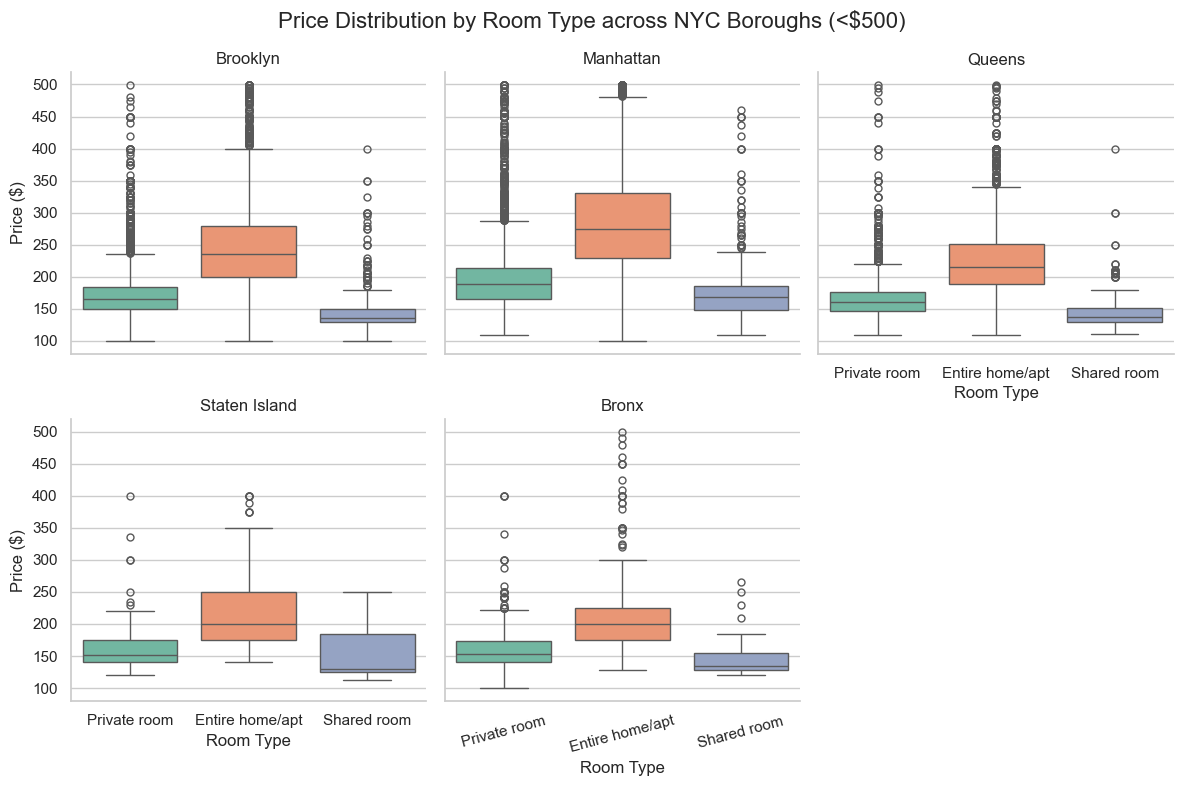

In [49]:
# Filter extreme outliers for better visualization
filtered_df = df[df['price'] < 500]  # Optional threshold to remove outliers

# Set the plot style
sns.set(style="whitegrid")

# Create FacetGrid with boxplots
g = sns.catplot(
    data=filtered_df,
    x='room_type',
    y='price',
    hue='room_type',
    legend=False,
    col='neighbourhood_group',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=1,
    palette='Set2'
)

# Improve readability
g.set_titles("{col_name}")
g.set_axis_labels("Room Type", "Price ($)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Price Distribution by Room Type across NYC Boroughs (<$500)", fontsize=16)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### 📉 Price Distribution by Room Type (NYC)

- **Room Type Price Order:** Entire home > Private room > Shared room  
- **Price Spread:** Entire homes show widest range + most outliers  
- **By Borough:** Manhattan is priciest, Bronx/Staten Island are cheapest  

**Conclusion:**  
🏠 Entire homes cost the most (esp. in Manhattan)  
🛏️ Shared rooms are cheapest, often in Bronx & Staten Island


<h4 style="font-family:Segoe UI,Tahoma,Geneva,Verdana,sans-serif; font-size:1.5em; color: #00ff59ff; margin-top:20px; margin-bottom:10px;">
Host Activity and Listing Type:</h4>

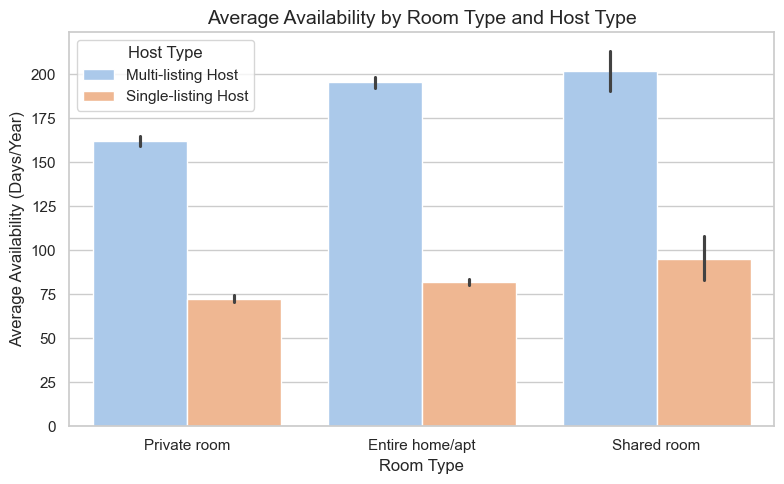

In [50]:
# Classify hosts into categories
df['host_type'] = df['calculated_host_listings_count'].apply(lambda x: 'Single-listing Host' if x == 1 else 'Multi-listing Host')

# Filter out extremely high values for better visuals
df_filtered = df[df['availability_365'] <= 365]

# Grouped bar plot: Average availability by room type and host type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_filtered,
    x='room_type',
    y='availability_365',   # Change to 'number_of_reviews' if desired
    hue='host_type',
    palette='pastel'
)

plt.title("Average Availability by Room Type and Host Type", fontsize=14)
plt.xlabel("Room Type")
plt.ylabel("Average Availability (Days/Year)")
plt.legend(title="Host Type")
plt.tight_layout()
plt.show()


### 🏠 Airbnb NYC – Avg Availability by Room & Host

- **Multi-listing hosts:** ~160–200 days/year  
- **Single-listing hosts:** ~70–95 days/year  
- **Shared rooms:** Most available across both host types  
- **Entire homes:** Show the biggest gap between host types  

**Conclusion:**  
➡️ *Multi-listing hosts behave like businesses, while single-listing hosts are more occasional.*


###  Key Insights & Recommendations

* **Pricing:** Higher in *Manhattan/Brooklyn*, especially for *entire homes*.
* **Market Segments:**
  - `'Luxury'`: Entire homes, central areas
  - `'Budget'`: Private/shared rooms, outer areas
  - `'Short-term'`: Low min. nights, high reviews
  - `'Long-term'`: High min. nights, high availability

* **Host Types:**
  - *Professional*: More listings, higher availability
  - *Individual*: Fewer listings, lower availability

* **Reviews:** More reviews = affordable pricing.  
  *New listings*: Higher price, no reviews.

* **Popular Areas:** Williamsburg, Midtown, Harlem (high listings & variety)

* **Availability:**  
  - *Pro hosts*: Active ~6–7 months/year  
  - *Individuals*: Active ~2–3 months/year  
  - *No strong seasonality*

* **Outliers:** Listings with >$1000 price or >300-night min. stay distort data.

---

###  Takeaways

* **Hosts** should optimize price & availability.
* **Airbnb** can detect outliers and improve listing quality.
* **Renters** can save by choosing reviewed, fairly priced listings.
